Creando Nombres

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_json("https://raw.githubusercontent.com/ElProfeAlejo/tratamiento_datos_python/main/ranking.json")
nombres_m = df[df['sexo'] == 'M'].sample(200)
nombres_f = df[df['sexo'] == 'F'].sample(200)

In [98]:
nombres_m

,nome,regiao,freq,rank,sexo
190,NATANAEL,0,69835,191,M
43,THIAGO,0,341645,44,M
65,MAURICIO,0,234847,66,M
91,WESLEY,0,156101,92,M
6,PEDRO,0,1213557,7,M
...,...,...,...,...,...
115,MILTON,0,125669,116,M
52,SAMUEL,0,291057,53,M
177,CLAUDINEI,0,74264,178,M
100,JOEL,0,143904,101,M


In [99]:
nombres_f

,nome,regiao,freq,rank,sexo
382,LIDIANE,0,86963,183,F
315,TALITA,0,140494,116,F
385,SHEILA,0,85939,186,F
321,LIVIA,0,135979,122,F
373,GERALDA,0,91752,174,F
...,...,...,...,...,...
291,CELIA,0,184096,92,F
388,POLIANA,0,84237,189,F
217,LUCIANA,0,429769,18,F
323,IVONE,0,131256,124,F


In [100]:
dic_columnas = {
    'nome':'nombre',
    'regiao':'región'
}
nombres_m.rename(columns=dic_columnas, inplace=True)

In [101]:
dic_columnas = {
    'nome':'nombre',
    'regiao':'región'
}
nombres_f.rename(columns=dic_columnas, inplace=True)

In [102]:
nombres_m

,nombre,región,freq,rank,sexo
190,NATANAEL,0,69835,191,M
43,THIAGO,0,341645,44,M
65,MAURICIO,0,234847,66,M
91,WESLEY,0,156101,92,M
6,PEDRO,0,1213557,7,M
...,...,...,...,...,...
115,MILTON,0,125669,116,M
52,SAMUEL,0,291057,53,M
177,CLAUDINEI,0,74264,178,M
100,JOEL,0,143904,101,M


In [103]:
nombres_f

,nombre,región,freq,rank,sexo
382,LIDIANE,0,86963,183,F
315,TALITA,0,140494,116,F
385,SHEILA,0,85939,186,F
321,LIVIA,0,135979,122,F
373,GERALDA,0,91752,174,F
...,...,...,...,...,...
291,CELIA,0,184096,92,F
388,POLIANA,0,84237,189,F
217,LUCIANA,0,429769,18,F
323,IVONE,0,131256,124,F


In [104]:
print(f'Cantidad de nombres: {len(nombres_m) + len(nombres_f)}')

Cantidad de nombres: 400


In [105]:
frames = [nombres_m, nombres_f]
frames

[        nombre  región     freq  rank sexo
 190   NATANAEL       0    69835   191    M
 43      THIAGO       0   341645    44    M
 65    MAURICIO       0   234847    66    M
 91      WESLEY       0   156101    92    M
 6        PEDRO       0  1213557     7    M
 ..         ...     ...      ...   ...  ...
 115     MILTON       0   125669   116    M
 52      SAMUEL       0   291057    53    M
 177  CLAUDINEI       0    74264   178    M
 100       JOEL       0   143904   101    M
 164      JAIRO       0    78445   165    M
 
 [200 rows x 5 columns],
       nombre  región    freq  rank sexo
 382  LIDIANE       0   86963   183    F
 315   TALITA       0  140494   116    F
 385   SHEILA       0   85939   186    F
 321    LIVIA       0  135979   122    F
 373  GERALDA       0   91752   174    F
 ..       ...     ...     ...   ...  ...
 291    CELIA       0  184096    92    F
 388  POLIANA       0   84237   189    F
 217  LUCIANA       0  429769    18    F
 323    IVONE       0  131256   124

In [106]:
nombres = pd.concat(frames)[['nombre']]
nombres

,nombre
190,NATANAEL
43,THIAGO
65,MAURICIO
91,WESLEY
6,PEDRO
...,...
291,CELIA
388,POLIANA
217,LUCIANA
323,IVONE


In [107]:
nombres = pd.concat(frames)['nombre'].to_frame()
nombres

,nombre
190,NATANAEL
43,THIAGO
65,MAURICIO
91,WESLEY
6,PEDRO
...,...
291,CELIA
388,POLIANA
217,LUCIANA
323,IVONE


Incluyendo ID de alumnos

In [108]:
import numpy as np

In [109]:
nombres.sample(5)

,nombre
107,VAGNER
35,ALEXANDRE
258,ALESSANDRA
155,EMANUEL
369,JOELMA


In [110]:
np.random.seed(123)

In [111]:
total_alumnos = len(nombres)
total_alumnos

400

In [112]:
nombres['ID_alumno'] = np.random.permutation(total_alumnos)+1
nombres.head(5)

,nombre,ID_alumno
190,NATANAEL,235
43,THIAGO,43
65,MAURICIO,304
91,WESLEY,156
6,PEDRO,343


In [113]:
dominios = ['@dominiodeemail.com','@serviciodeemail.com']

In [114]:
nombres['dominio'] = np.random.choice(dominios, total_alumnos)

In [115]:
nombres.head(10)

,nombre,ID_alumno,dominio
190,NATANAEL,235,@dominiodeemail.com
43,THIAGO,43,@serviciodeemail.com
65,MAURICIO,304,@serviciodeemail.com
91,WESLEY,156,@serviciodeemail.com
6,PEDRO,343,@serviciodeemail.com
114,ARTHUR,310,@dominiodeemail.com
68,CAIO,55,@dominiodeemail.com
47,JULIO,288,@dominiodeemail.com
176,CELIO,379,@serviciodeemail.com
183,MARLON,92,@serviciodeemail.com


In [116]:
nombres['email'] = nombres.nombre.str.cat(nombres.dominio).str.lower()
nombres.head()

,nombre,ID_alumno,dominio,email
190,NATANAEL,235,@dominiodeemail.com,natanael@dominiodeemail.com
43,THIAGO,43,@serviciodeemail.com,thiago@serviciodeemail.com
65,MAURICIO,304,@serviciodeemail.com,mauricio@serviciodeemail.com
91,WESLEY,156,@serviciodeemail.com,wesley@serviciodeemail.com
6,PEDRO,343,@serviciodeemail.com,pedro@serviciodeemail.com


En esta aula, aprendimos:

A leer un json con la función read_json() para buscar los nombres de los alumnos y alumnas.
A juntar los nombres masculinos y femeninos con la función concat() y transformarlos en un nuevo DataFrame con el comando to_frame().
A insertar un id para identificar mejor a cada persona.

In [117]:
nombres

,nombre,ID_alumno,dominio,email
190,NATANAEL,235,@dominiodeemail.com,natanael@dominiodeemail.com
43,THIAGO,43,@serviciodeemail.com,thiago@serviciodeemail.com
65,MAURICIO,304,@serviciodeemail.com,mauricio@serviciodeemail.com
91,WESLEY,156,@serviciodeemail.com,wesley@serviciodeemail.com
6,PEDRO,343,@serviciodeemail.com,pedro@serviciodeemail.com
...,...,...,...,...
291,CELIA,231,@dominiodeemail.com,celia@dominiodeemail.com
388,POLIANA,99,@serviciodeemail.com,poliana@serviciodeemail.com
217,LUCIANA,323,@dominiodeemail.com,luciana@dominiodeemail.com
323,IVONE,383,@serviciodeemail.com,ivone@serviciodeemail.com


In [118]:
nombres['matriculas'] = np.ceil(np.random.exponential(size=total_alumnos)*1.5).astype(int)
nombres.head()

,nombre,ID_alumno,dominio,email,matriculas
190,NATANAEL,235,@dominiodeemail.com,natanael@dominiodeemail.com,3
43,THIAGO,43,@serviciodeemail.com,thiago@serviciodeemail.com,1
65,MAURICIO,304,@serviciodeemail.com,mauricio@serviciodeemail.com,1
91,WESLEY,156,@serviciodeemail.com,wesley@serviciodeemail.com,3
6,PEDRO,343,@serviciodeemail.com,pedro@serviciodeemail.com,1


In [119]:
nombres.matriculas.describe()

count    400.000000
mean       2.137500
std        1.511392
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_10556\401714227.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nombres.matriculas);
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

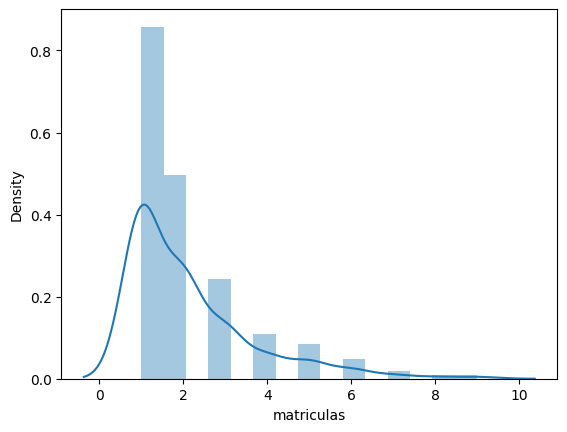

In [120]:
sns.distplot(nombres.matriculas);
plt.show()

In [121]:
nombres.matriculas.value_counts()

matriculas
1    183
2    106
3     52
4     23
5     18
6     10
7      4
8      2
9      2
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_10556\3498945727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nombres.matriculas.value_counts());
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

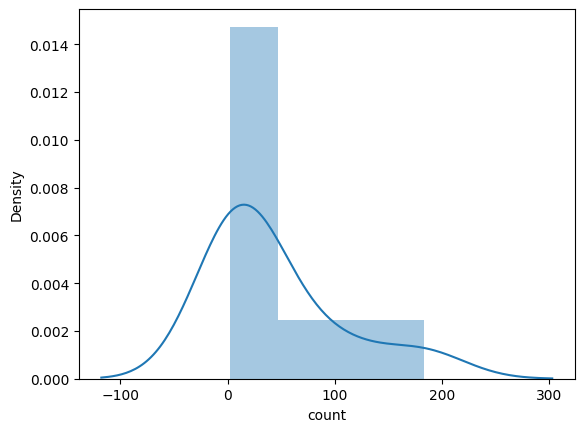

In [122]:
sns.distplot(nombres.matriculas.value_counts());
plt.show()

In [123]:
url = ('https://www.tiobe.com/tiobe-index/')

In [124]:
cursos = pd.read_html(url)
cursos

[    Sep 2023  Sep 2022  Change  Programming Language Programming Language.1  \
 0          1         1     NaN                   NaN                 Python   
 1          2         2     NaN                   NaN                      C   
 2          3         4     NaN                   NaN                    C++   
 3          4         3     NaN                   NaN                   Java   
 4          5         5     NaN                   NaN                     C#   
 5          6         7     NaN                   NaN             JavaScript   
 6          7         6     NaN                   NaN           Visual Basic   
 7          8        10     NaN                   NaN                    PHP   
 8          9         8     NaN                   NaN      Assembly language   
 9         10         9     NaN                   NaN                    SQL   
 10        11        15     NaN                   NaN                Fortran   
 11        12        12     NaN         

In [125]:
cursos = cursos[0]
cursos

,Sep 2023,Sep 2022,Change,Programming Language,Programming Language.1,Ratings,Change.1
0,1,1,NaN,NaN,Python,14.16%,-1.58%
1,2,2,NaN,NaN,C,11.27%,-2.70%
2,3,4,NaN,NaN,C++,10.65%,+0.90%
3,4,3,NaN,NaN,Java,9.49%,-2.23%
4,5,5,NaN,NaN,C#,7.31%,+2.42%
5,6,7,NaN,NaN,JavaScript,3.30%,+0.48%
6,7,6,NaN,NaN,Visual Basic,2.22%,-2.18%
7,8,10,NaN,NaN,PHP,1.55%,-0.13%
8,9,8,NaN,NaN,Assembly language,1.53%,-0.96%
9,10,9,NaN,NaN,SQL,1.44%,-0.57%


In [126]:
cursos.head()

,Sep 2023,Sep 2022,Change,Programming Language,Programming Language.1,Ratings,Change.1
0,1,1,NaN,NaN,Python,14.16%,-1.58%
1,2,2,NaN,NaN,C,11.27%,-2.70%
2,3,4,NaN,NaN,C++,10.65%,+0.90%
3,4,3,NaN,NaN,Java,9.49%,-2.23%
4,5,5,NaN,NaN,C#,7.31%,+2.42%


In [127]:
dic_curso = {
    'Programming Language.1':'Nombre del Curso'
}
cursos = cursos.rename(columns=dic_curso)

In [128]:
cursos = cursos[['Nombre del Curso']]

In [129]:
cursos

,Nombre del Curso
0,Python
1,C
2,C++
3,Java
4,C#
5,JavaScript
6,Visual Basic
7,PHP
8,Assembly language
9,SQL


In [130]:
cursos['ID'] = cursos.index + 1
cursos.head(20)

,Nombre del Curso,ID
0,Python,1
1,C,2
2,C++,3
3,Java,4
4,C#,5
5,JavaScript,6
6,Visual Basic,7
7,PHP,8
8,Assembly language,9
9,SQL,10


In [131]:
cursos = cursos.set_index('ID')

In [132]:
cursos.head()

,Nombre del Curso
ID,
1,Python
2,C
3,C++
4,Java
5,C#


In [133]:
cursos.shape[0]

20

In [134]:
cursos.shape[1]

1

En esta aula, aprendimos:

A leer una tabla de una página html con la función read_html(), pasando la url como parámetro para buscar los nombres de los cursos.
A transformar el resultado de esta función en un DataFrame con el código cursos = cursos[0].
A crear un ID para cada curso y a configurar el index para que sea el ID con el código cursos = cursos.set_index('id').

In [135]:
nombres.head()

,nombre,ID_alumno,dominio,email,matriculas
190,NATANAEL,235,@dominiodeemail.com,natanael@dominiodeemail.com,3
43,THIAGO,43,@serviciodeemail.com,thiago@serviciodeemail.com,1
65,MAURICIO,304,@serviciodeemail.com,mauricio@serviciodeemail.com,1
91,WESLEY,156,@serviciodeemail.com,wesley@serviciodeemail.com,3
6,PEDRO,343,@serviciodeemail.com,pedro@serviciodeemail.com,1


In [136]:
cursos.head()

,Nombre del Curso
ID,
1,Python
2,C
3,C++
4,Java
5,C#


In [137]:
todas_matriculas = []
x = np.random.rand(len(cursos))
prob = x / sum(x) #probabilidad
prob

array([0.00518568, 0.07653279, 0.01906183, 0.02289126, 0.01660535,
       0.08260089, 0.00960817, 0.06165505, 0.07957754, 0.05703094,
       0.07331421, 0.02069904, 0.05753694, 0.05983724, 0.03913037,
       0.07432327, 0.05928356, 0.07640064, 0.0643052 , 0.04442005])

In [138]:
for index, row in nombres.iterrows():
    id = row.ID_alumno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
print(f'{id}')     
print(f'{matriculas}')   
print(f'{mat}')   

matriculas = pd.DataFrame(todas_matriculas, columns=['id_alumno','id_curso'])
matriculas.head()

366
1
[366, 9]


,id_alumno,id_curso
0,235,11
1,235,11
2,235,2
3,43,13
4,304,10


In [139]:
matriculas.groupby('id_curso').count().join(cursos['Nombre del Curso'])[['Nombre del Curso','id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending=False)

,Nombre del Curso,Total
id_curso,,
2,C,81
18,R,79
16,Swift,71
6,JavaScript,68
9,Assembly language,68
19,Ruby,59
11,Fortran,57
8,PHP,54
10,SQL,48


In [140]:
prob

array([0.00518568, 0.07653279, 0.01906183, 0.02289126, 0.01660535,
       0.08260089, 0.00960817, 0.06165505, 0.07957754, 0.05703094,
       0.07331421, 0.02069904, 0.05753694, 0.05983724, 0.03913037,
       0.07432327, 0.05928356, 0.07640064, 0.0643052 , 0.04442005])

In [141]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['Nombre del Curso'])[['Nombre del Curso','id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending=False)
matriculas_por_curso

,Nombre del Curso,Total
id_curso,,
2,C,81
18,R,79
16,Swift,71
6,JavaScript,68
9,Assembly language,68
19,Ruby,59
11,Fortran,57
8,PHP,54
10,SQL,48


In [142]:
matriculas_por_curso1 = matriculas.groupby('id_curso').count().join(cursos['Nombre del Curso'])[['Nombre del Curso','id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending=False)
matriculas_por_curso1

,Nombre del Curso,Total
id_curso,,
2,C,81
18,R,79
16,Swift,71
6,JavaScript,68
9,Assembly language,68
19,Ruby,59
11,Fortran,57
8,PHP,54
10,SQL,48


In [143]:
matriculas_por_curso2 = matriculas.groupby('id_curso').count().join(cursos['Nombre del Curso'])[['Nombre del Curso','id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending=False)
matriculas_por_curso2

,Nombre del Curso,Total
id_curso,,
2,C,81
18,R,79
16,Swift,71
6,JavaScript,68
9,Assembly language,68
19,Ruby,59
11,Fortran,57
8,PHP,54
10,SQL,48


In [144]:
matriculas_por_curso.to_csv('matriculas_por_curso', index=False)

In [145]:
# matriculas_por_curso1.to_json('matriculas_por_curso')

In [146]:
# matriculas_por_curso2.to_html('matriculas_por_curso', index=False)

En esta aula, aprendimos:

A crear una nueva columna en el DataFrame nombres llamada matriculas para mostrar el número de cursos inscritos que tiene cada alumno.
A generar un nuevo DataFrame matriculas para guardar los cursos inscritos que tiene cada alumno.
A realizar un join entre los DataFrames matriculas y cursos para mostrar el número de estudiantes en cada curso.
Y aprendimos también a leer y escribir un DataFrame en diferentes tipos: csv, json y html.

---------------------------------------------------------------------------------------------------------------------------------

Creando el banco SQL

In [147]:
from sqlalchemy import create_engine, MetaData, Table
import sqlite3 

In [148]:
engine = create_engine('sqlite://')
engine

Engine(sqlite://)

In [149]:
matriculas_por_curso.to_sql('matriculas', engine)

20

Busquedas en Banco SQL

In [150]:
query = 'select * from matriculas where total < 20'

In [151]:
pd.read_sql(query, engine)

,id_curso,Nombre del Curso,Total
0,3,C++,18
1,4,Java,17
2,12,Go,12
3,1,Python,8
4,7,Visual Basic,4


In [152]:
muchas_matriculas = pd.read_sql_table('matriculas', engine,columns=['Nombre del Curso','Total'])
muchas_matriculas

,Nombre del Curso,Total
0,C,81
1,R,79
2,Swift,71
3,JavaScript,68
4,Assembly language,68
5,Ruby,59
6,Fortran,57
7,PHP,54
8,SQL,48
9,Scratch,46


In [153]:
muchas_matriculas = muchas_matriculas.query('Total > 50')
muchas_matriculas

,Nombre del Curso,Total
0,C,81
1,R,79
2,Swift,71
3,JavaScript,68
4,Assembly language,68
5,Ruby,59
6,Fortran,57
7,PHP,54


Escribiendo en el Banco SQL

In [154]:
muchas_matriculas.to_sql('muchas_matriculas', engine)

8

In [155]:
muchas_matriculas

,Nombre del Curso,Total
0,C,81
1,R,79
2,Swift,71
3,JavaScript,68
4,Assembly language,68
5,Ruby,59
6,Fortran,57
7,PHP,54


In [156]:
print(engine)

Engine(sqlite://)


En esta aula, aprendimos:

A usar Pandas para leer y escribir en un banco sql.
A usar el banco SQLite que viene con Pandas y a crear un banco local.
A guardar el DataFrame matrículas con el comando matriculas_por_curso.to_sql('matriculas', engine).
A leer una tabla del banco con la función read_sql_table() y a mostrar el resultado de una query con el comando read_sql(), pasando la query como parámetro.

--------------------------------------------------------------------------------------------------------------------------------------------------

In [157]:
matriculas.sample(5)

,id_alumno,id_curso
245,190,9
324,368,12
128,228,18
61,328,9
218,342,14


In [158]:
id_curso = 16 
proxima_clase = matriculas.query(f'id_curso == {id_curso}')
proxima_clase

,id_alumno,id_curso
21,174,16
22,174,16
23,218,16
28,217,16
77,262,16
...,...,...
761,169,16
787,100,16
791,362,16
839,215,16


In [159]:
proxima_clase.set_index('id_alumno').join(nombres.set_index('ID_alumno'))

,id_curso,nombre,dominio,email,matriculas
id_alumno,,,,,
2,16,LUCILENE,@dominiodeemail.com,lucilene@dominiodeemail.com,6
5,16,FABRICIO,@serviciodeemail.com,fabricio@serviciodeemail.com,1
6,16,JAIR,@serviciodeemail.com,jair@serviciodeemail.com,3
13,16,VALDECIR,@serviciodeemail.com,valdecir@serviciodeemail.com,4
19,16,ANA,@dominiodeemail.com,ana@dominiodeemail.com,1
...,...,...,...,...,...
358,16,DENIS,@serviciodeemail.com,denis@serviciodeemail.com,3
362,16,IRACI,@dominiodeemail.com,iraci@dominiodeemail.com,2
376,16,CAMILA,@serviciodeemail.com,camila@serviciodeemail.com,1


In [160]:
proxima_clase.set_index('id_alumno').join(nombres.set_index('ID_alumno'))['nombre']

id_alumno
2       LUCILENE
5       FABRICIO
6           JAIR
13      VALDECIR
19           ANA
         ...    
358        DENIS
362        IRACI
376       CAMILA
384      JESSICA
397    REGINALDO
Name: nombre, Length: 71, dtype: object

In [161]:
proxima_clase.set_index('id_alumno').join(nombres.set_index('ID_alumno'))[['nombre']]

,nombre
id_alumno,
2,LUCILENE
5,FABRICIO
6,JAIR
13,VALDECIR
19,ANA
...,...
358,DENIS
362,IRACI
376,CAMILA


In [162]:
proxima_clase.set_index('id_alumno').join(nombres.set_index('ID_alumno'))['nombre'].to_frame()

,nombre
id_alumno,
2,LUCILENE
5,FABRICIO
6,JAIR
13,VALDECIR
19,ANA
...,...
358,DENIS
362,IRACI
376,CAMILA


In [163]:
proxima_clase.set_index('id_alumno').join(nombres.set_index('ID_alumno'))[['email']]

,email
id_alumno,
2,lucilene@dominiodeemail.com
5,fabricio@serviciodeemail.com
6,jair@serviciodeemail.com
13,valdecir@serviciodeemail.com
19,ana@dominiodeemail.com
...,...
358,denis@serviciodeemail.com
362,iraci@dominiodeemail.com
376,camila@serviciodeemail.com


In [164]:
nombre_aula = cursos.loc[id_curso]
nombre_aula

Nombre del Curso    Swift
Name: 16, dtype: object

In [165]:
nombre_aula = nombre_aula['Nombre del Curso']
nombre_aula

'Swift'

In [166]:
proxima_clase = proxima_clase.set_index('id_alumno').join(nombres.set_index('ID_alumno'))[['nombre']]

In [167]:
proxima_clase = proxima_clase.rename(columns={'nombre':f'Alumnos del curso de {nombre_aula}'})

In [168]:
proxima_clase.sample(5)

,Alumnos del curso de Swift
id_alumno,
229,CLEBER
397,REGINALDO
134,VIVIANE
215,ANDRESSA
5,FABRICIO


Transformando los datos a Excel

In [169]:
proxima_clase.to_excel('proxima_clase.xlsx', index=False)

In [170]:
datos_nuevos = pd.read_excel('proxima_clase.xlsx')

In [171]:
datos_nuevos

,Alumnos del curso de Swift
0,LUCILENE
1,FABRICIO
2,JAIR
3,VALDECIR
4,ANA
...,...
66,DENIS
67,IRACI
68,CAMILA
69,JESSICA


En esta aula, aprendimos:

A escoger un curso y seleccionar a todas las personas inscritas en este curso.
A exportar un DataFrame como tipo excel con el comando proxima_clase.to_excel('proxima_clase.xlsx', index = False).
A verificar si la exportación se realizó correctamente, leemos nuevamente el archivo Excel generado con el comando pd.read_excel('proxima_clase.xlsx').